We walked through the full machine learning workflow using the k-nearest neighbors algorithm. K-nearest neighbors works by finding similar, labelled examples from the training set for each instance in the test set and uses them to predict the label. K-nearest neighbors is known as an [instance-based](https://en.wikipedia.org/wiki/Instance-based_learning) learning algorithm because it relies completely on previous instances to make predictions. The k-nearest neighbors algorithm doesn't try to understand or capture the relationship between the feature columns and the target column.

Because the entire training dataset is used to find a new instance's nearest neighbors to make label predictions, this algorithm doesn't scale well to medium and larger datasets. If we have a million instances in our training data set and we want to make predictions for a hundred thousand new instances, we'd have to sort the million instances in the training set by Euclidean distance for each instance. The following diagram provides an overview of the complexity of k-nearest neighbors

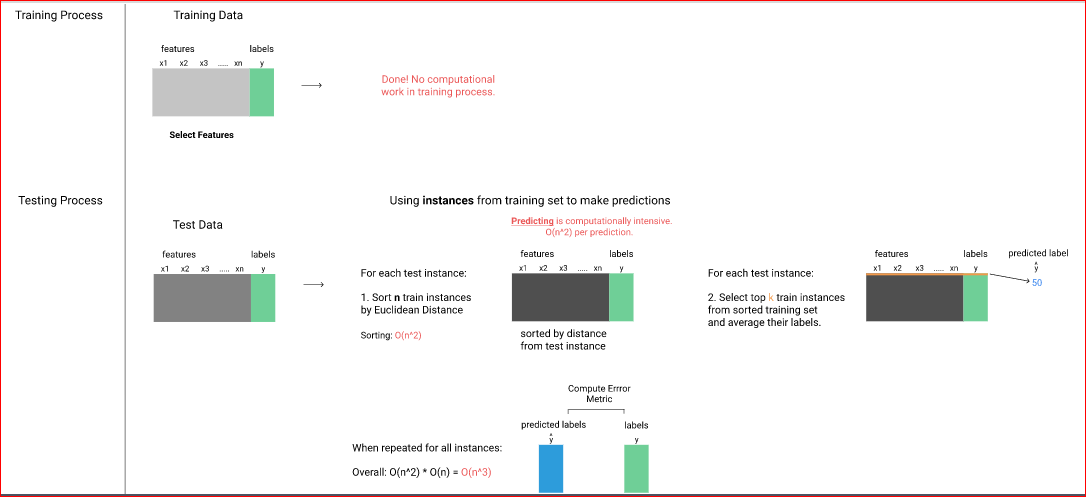

We need to instead learn about **parametric machine learning** approaches, like linear regression and logistic regression. Unlike the k-nearest neighbors algorithm, the result of the training process for these machine learning algorithms is a mathematical function that best approximates the patterns in the training set. In machine learning, this function is often referred to as a **model**.

In this project, we'll explore the most commonly used machine learning model -- the **linear regression model**. Parametric machine learning approaches work by making assumptions about the relationship between the features and the target column. In linear regression, the approximate relationship between the feature columns and the target column is expressed as a linear regression equation:

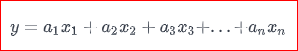

The following diagram provides an overview of the machine learning process for linear regression. For now, the goal isn't to understand the entire process but more to compare and contrast with the nonparametric approach of k-nearest neighbors.

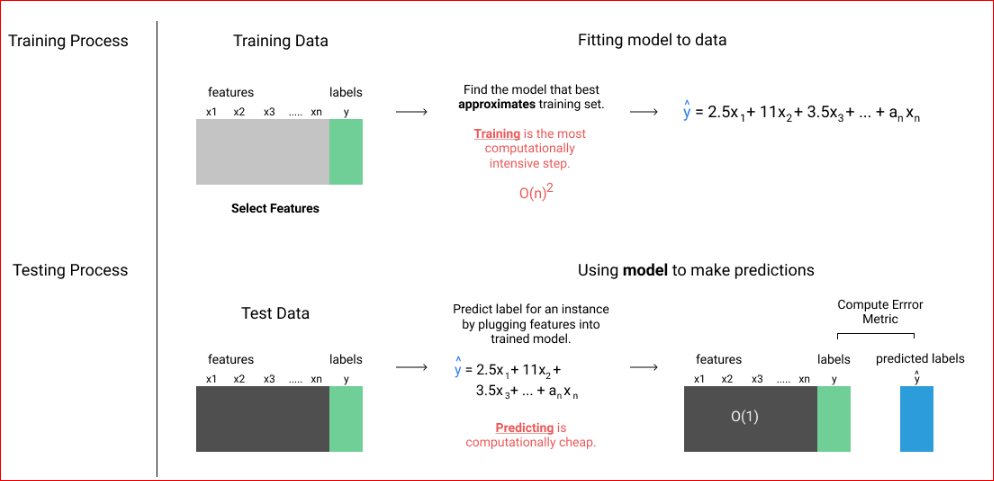

We'll work with a dataset on sold houses in Ames, Iowa. Each row in the dataset describes the properties of a single house as well as the amount it was sold for. We'll build models that predict the final sale price from its other attributes. Specifically, we'll explore the following questions:

* Which properties of a house most affect the final sale price?
* How effectively can we predict the sale price from just its properties?

This dataset was originally compiled by [Dean De Cock](https://www.truman.edu/faculty-staff/decock/) for the primary purpose of having a high quality dataset for regression.

Here are some of the columns:

* Lot Area: Lot size in square feet.
* Overall Qual: Rates the overall material and finish of the house.
* Overall Cond: Rates the overall condition of the house.
* Year Built: Original construction date.
* Low Qual Fin SF: Low quality finished square feet (all floors).
* Full Bath: Full bathrooms above grade.
* Fireplaces: Number of fireplaces.

In [26]:
import pandas as pd

data = pd.read_table("AmesHousing.txt",delimiter = "\t")
data.shape[0]/2

1465.0

In [27]:
train = data[:1460]
test = data[1460:]

In [28]:
print(train.info())
target = 'SalePrice'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Order              1460 non-null int64
PID                1460 non-null int64
MS SubClass        1460 non-null int64
MS Zoning          1460 non-null object
Lot Frontage       1211 non-null float64
Lot Area           1460 non-null int64
Street             1460 non-null object
Alley              109 non-null object
Lot Shape          1460 non-null object
Land Contour       1460 non-null object
Utilities          1460 non-null object
Lot Config         1460 non-null object
Land Slope         1460 non-null object
Neighborhood       1460 non-null object
Condition 1        1460 non-null object
Condition 2        1460 non-null object
Bldg Type          1460 non-null object
House Style        1460 non-null object
Overall Qual       1460 non-null int64
Overall Cond       1460 non-null int64
Year Built         1460 non-null int64
Year Remod/Add     1460 non-null int64
Roof Style         14

 [data documentation](https://s3.amazonaws.com/dq-content/307/data_description.txt)

We'll start by understanding the univariate case of linear regression, also known as **simple linear regression**. The following equation is the general form of the simple linear regression model.

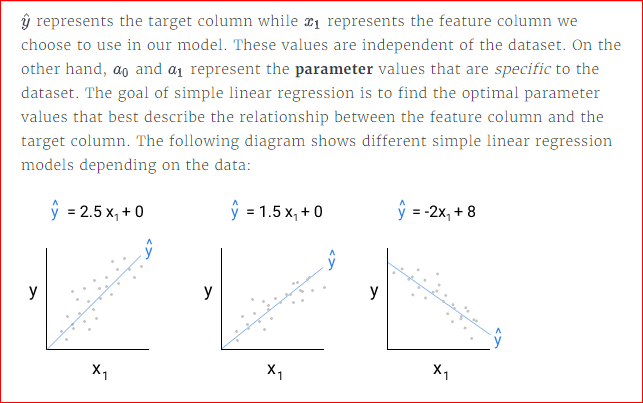

We can use scikit-learn to determine the optimal parameter values  and  based on the training data. Because one of the assumptions of linear regression is that the relationship between the feature(s) and the target column is linear, we want to pick a feature that seems like it has the strongest correlation with the final sale price.

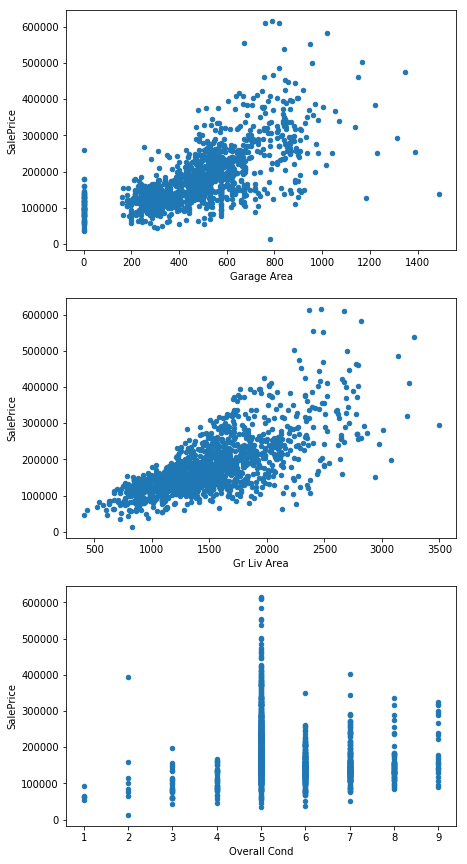

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (7,15))

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

train.plot(x="Garage Area", y = "SalePrice", ax=ax1, kind = "scatter")
train.plot(x = "Gr Liv Area", y = "SalePrice", ax=ax2, kind ="scatter")
train.plot(x = "Overall Cond", y = "SalePrice", ax=ax3, kind ="scatter")

We can tell that the **Gr Liv Area** feature correlates the most with the SalePrice column. We can confirm this by calculating the correlation between pairs of these columns using the pandas.DataFrame.corr() method

In [35]:
print(train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr()["SalePrice"])

Garage Area     0.662397
Gr Liv Area     0.698990
Overall Cond   -0.099395
SalePrice       1.000000
Name: SalePrice, dtype: float64


The correlation between Gr Liv Area and SalePrice is around 0.709, which is the highest. Closer the correlation coefficient is to 1.0, the stronger the correlation.

Updated form of our model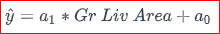

**Residual Sum Of Squares**

To find the optimal parameters for a linear regression model, we want to optimize the model's residual sum of squares (or [RSS](https://en.wikipedia.org/wiki/Residual_sum_of_squares)). Residual (often referred to as errors) describes the difference between the predicted values for the target column ($y^\^$) and the true values ($y$)

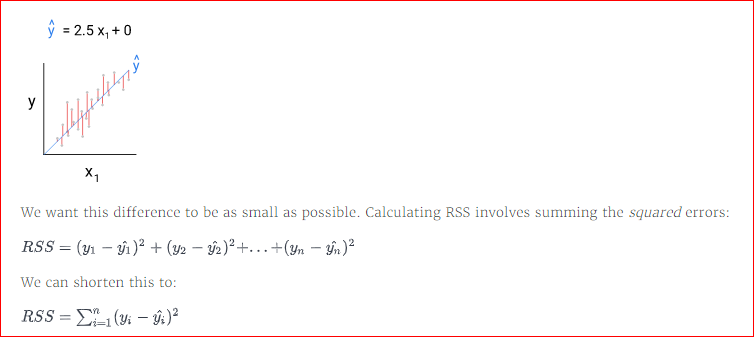

If we recall, the calculation for RSS seems very similar to the calculation for MSE (mean squared error).
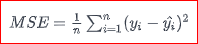

While we used the MSE on the test set, it's clear that the goal of minimizing RSS on the training set when training is a good idea.


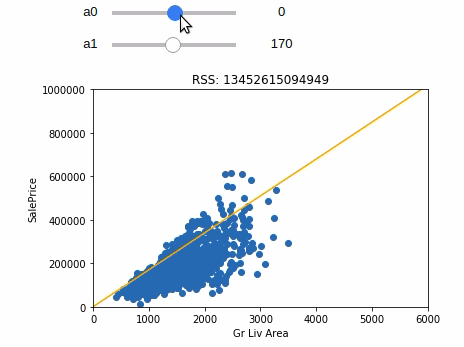

In [37]:
from IPython.display import Image

Image("rss.gif")

Let's now use scikit-learn to find the optimal parameter values for our model. The scikit-learn library was designed to easily swap and try different models. Because we're familiar with the scikit-learn workflow for k-nearest neighbors, switching to using linear regression is straightforward.

Instead of working with the sklearn.neighbors.KNeighborsRegressors class, we work with the sklearn.linear_model.LinearRegression class. The LinearRegression class also has it's own fit() method. Specific to this model, however, are the coef_ and intercept_ attributes, which return $a_1$ ($a_1$ to $a_n$ if it were a multivariate regression model) and $a_0$ accordingly.

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train[['Gr Liv Area']], train[target])
a1 = model.coef_
a0 = model.intercept_

print(a1, a0)

[116.86624683] 5366.821710056043


Above we fit a univariate linear regression model between the Gr Liv Area and SalePrice columns. We then displayed the single coefficient and the residual value. If we refer back to the format of our linear regression model, the fitted model can be represented as:

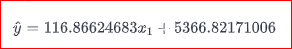

One way to interpret this model is "for every 1 square foot increase in above ground living area, we can expect the home's value to increase by approximately 116.87 dollars".

In [45]:
# Prediction

import numpy as np
from sklearn.metrics import mean_squared_error

prediction = model.predict(test[["Gr Liv Area"]])
mse = mean_squared_error(test[target], prediction)
rmse = np.sqrt(mse)
rmse

57088.25161263909

we can extend what we've learned to the multivariate case (often called **multiple linear regression**). A multiple linear regression model allows us to capture the relationship between multiple feature columns and the target column. Here's what the formula looks like:
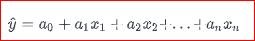

When using multiple features, the main challenge is **selecting relevant features**.

In [46]:
cols = ['Overall Cond', 'Gr Liv Area']
model.fit(train[cols], train[target])
predictions = model.predict(test[cols])
rmse = np.sqrt(mean_squared_error(test[target],predictions))
rmse

57066.90779448559